<a href="https://colab.research.google.com/github/cuimingyang1996/Azog/blob/master/Time_series_Udemy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df=pd.read_csv('/content/drive/My Drive/Copy of perrin-freres-monthly-champagne-.csv')

In [ ]:
df.head()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [ ]:
df.columns=['Month','Sales']
df.head()

,Month,Sales
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [ ]:
df.shape

(107, 2)

In [ ]:
df.isnull().sum()

,0
Month,1
Sales,2


In [ ]:
df.tail()

,Month,Sales
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0
105,NaN,NaN
106,Perrin Freres monthly champagne sales millions...,NaN


In [ ]:
df = df.dropna()

In [ ]:
df.shape

(105, 2)

In [ ]:
df['Month']=pd.to_datetime(df['Month'])

In [ ]:
df.dtypes

,0
Month,datetime64[ns]
Sales,float64


## ML numbers
##Time series-Month

In [ ]:
df.set_index('Month',inplace=True)

In [ ]:
df.head()

,Sales
Month,
1964-01-01,2815.0
1964-02-01,2672.0
1964-03-01,2755.0
1964-04-01,2721.0
1964-05-01,2946.0


In [ ]:
df.describe()

,Sales
count,105.000000
mean,4761.152381
std,2553.502601
min,1413.000000
25%,3113.000000
50%,4217.000000
75%,5221.000000
max,13916.000000


<Axes: xlabel='Month'>

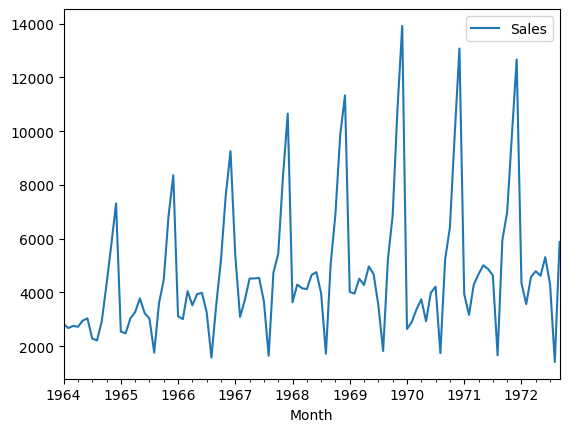

In [ ]:
df.plot()

In [ ]:
## seasonal data
## christmas- sales up

In [ ]:
##adfuller test,p-value < 0.005

In [ ]:
from statsmodels.tsa.stattools import adfuller

## Hypothesis testing
## Null: H0- data is not Stationary
## Alt.: H1- data is not Stationary

In [ ]:
adfuller(df['Sales'])

(-1.8335930563276215,
 0.36391577166024586,
 11,
 93,
 {'1%': -3.502704609582561,
  '5%': -2.8931578098779522,
  '10%': -2.583636712914788},
 1478.4633060594724)

In [ ]:
def adfuller_test(sales):
  result=adfuller(sales)

  labels=['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']

  for value in zip(result,labels):
    print('{} : {} '.format(labels,value))
  if result[1]<=0.05:
    print('Reject the null hypothesis, and data is stationary')
  else:
    print('Fail to reject the null hypothesis, and data is not stationary')

In [ ]:
adfuller_test(df['Sales'])

['ADF Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'] : (-1.8335930563276215, 'ADF Test Statistic') 
['ADF Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'] : (0.36391577166024586, 'p-value') 
['ADF Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'] : (11, '#Lags Used') 
['ADF Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'] : (93, 'Number of Observations Used') 
Fail to reject the null hypothesis, and data is not stationary


##Data must be stationary

In [ ]:
df["Sales"]

,Sales
Month,
1964-01-01,2815.0
1964-02-01,2672.0
1964-03-01,2755.0
1964-04-01,2721.0
1964-05-01,2946.0
...,...
1972-05-01,4618.0
1972-06-01,5312.0
1972-07-01,4298.0


In [ ]:
df["Sales"].shift(1)

,Sales
Month,
1964-01-01,NaN
1964-02-01,2815.0
1964-03-01,2672.0
1964-04-01,2755.0
1964-05-01,2721.0
...,...
1972-05-01,4788.0
1972-06-01,4618.0
1972-07-01,5312.0


In [ ]:
df['Seasonal first diff'] = df['Sales'] - df['Sales'].shift(12)

In [ ]:
df['Seasonal first diff']

,Seasonal first diff
Month,
1964-01-01,NaN
1964-02-01,NaN
1964-03-01,NaN
1964-04-01,NaN
1964-05-01,NaN
...,...
1972-05-01,-392.0
1972-06-01,438.0
1972-07-01,-335.0


In [ ]:
df.head()

,Sales,Seasonal first diff
Month,,
1964-01-01,2815.0,NaN
1964-02-01,2672.0,NaN
1964-03-01,2755.0,NaN
1964-04-01,2721.0,NaN
1964-05-01,2946.0,NaN


<Axes: xlabel='Month'>

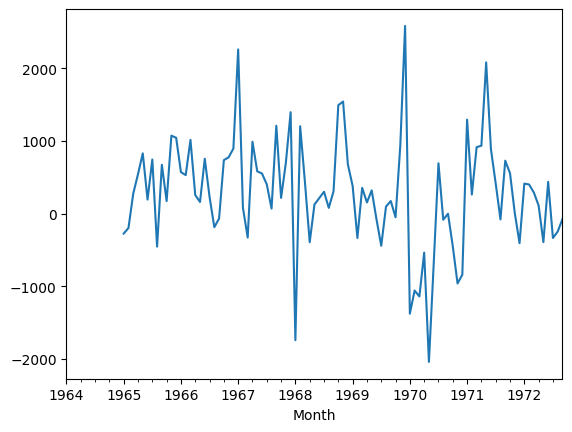

In [ ]:
df['Seasonal first diff'].plot()

## ARIMA model

In [ ]:
## ARIMA = AR + I(Differency) + MA (Moving average)
## (p,d,q)
## p -pacf graph
## d=1
## q= acf graph

In [ ]:
df.head(15)

,Sales,Seasonal first diff
Month,,
1964-01-01,2815.0,NaN
1964-02-01,2672.0,NaN
1964-03-01,2755.0,NaN
1964-04-01,2721.0,NaN
1964-05-01,2946.0,NaN
1964-06-01,3036.0,NaN
1964-07-01,2282.0,NaN
1964-08-01,2212.0,NaN
1964-09-01,2922.0,NaN


In [ ]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
#Autocorrelation(plot_acf),Partial Autocorrelation(plot_pacf)

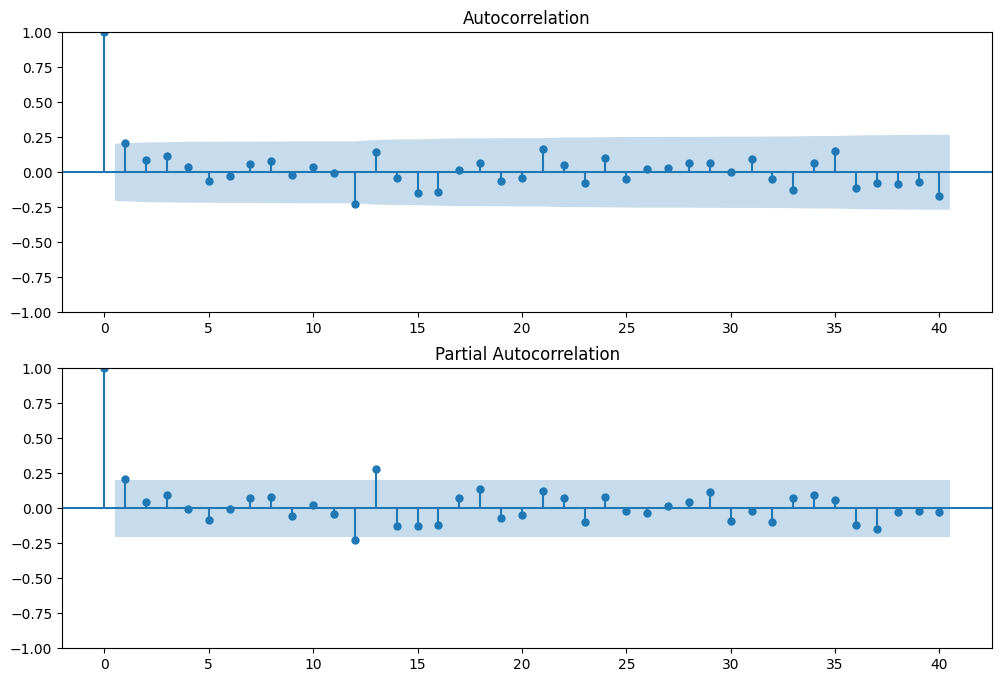

In [ ]:
fig = plt.figure(figsize=(12,8))
ax1=fig.add_subplot(211)
fig = plot_acf(df['Seasonal first diff'].iloc[13:], lags = 40, ax=ax1)

ax2=fig.add_subplot(212)
fig = plot_pacf(df['Seasonal first diff'].iloc[13:], lags = 40, ax=ax2)


In [ ]:
# For non-seasonal data
#p=1, d=1, q=0 or 1
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

In [ ]:
model = sm.tsa.arima.ARIMA(df['Sales'],order=(1,1,1))
model=model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Sales   No. Observations:                  105
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -952.814
Date:                Thu, 26 Sep 2024   AIC                           1911.627
Time:                        18:37:37   BIC                           1919.560
Sample:                    01-01-1964   HQIC                          1914.841
                         - 09-01-1972                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4545      0.114      4.001      0.000       0.232       0.677
ma.L1         -0.9667      0.056    -17.329      0.000      -1.076      -0.857
sigma2      5.226e+06   6.17e+05      8.472      0.000    4.02e+06    6.44e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.91   Jarque-Bera (JB):                 2.59
Prob(Q):                              0.34   Prob(JB):                         0.27
Heteroskedasticity (H):               3.40   Skew:                             0.05
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.77
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
df.shape

(105, 2)

In [ ]:
df['forecast'] = model.predict(start=90,end=103,dynamic=True)

In [ ]:
df.tail(20)

,Sales,Seasonal first diff,forecast
Month,,,
1971-02-01,3162.0,263.0,NaN
1971-03-01,4286.0,916.0,NaN
1971-04-01,4676.0,936.0,NaN
1971-05-01,5010.0,2083.0,NaN
1971-06-01,4874.0,888.0,NaN
1971-07-01,4633.0,416.0,4976.815618
1971-08-01,1659.0,-79.0,5023.547541
1971-09-01,5951.0,730.0,5044.788211
1971-10-01,6981.0,557.0,5054.442555


<Axes: xlabel='Month'>

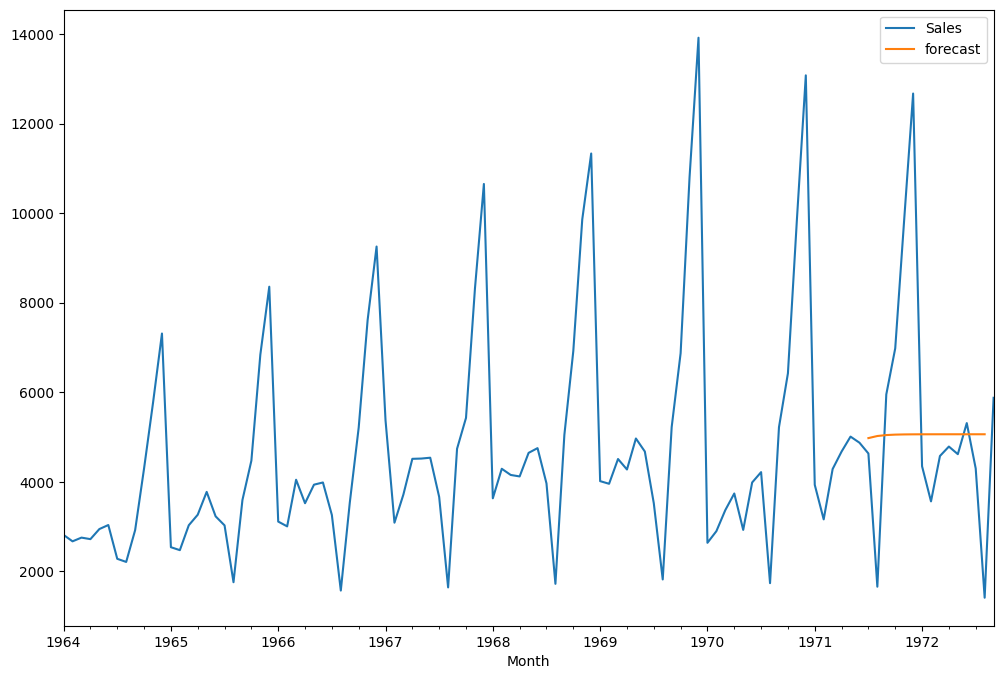

In [ ]:
df[['Sales','forecast']].plot(figsize=(12,8))

In [ ]:
## Seasonal data -- ARIMA is not
##SARIMAX -- Seasonal ARIMA

In [ ]:
import statsmodels.api as sm

In [ ]:
##(p,d,q,shift_value)

In [ ]:
model2 = sm.tsa.statespace.SARIMAX(df['Sales'],order=(1,1,1), seasonal_order=(1,1,1,12))


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [ ]:
results=model2.fit()

In [ ]:
df['forecast_SARIMAX'] = results.predict(start=90,end=103,dynamic=True)

In [ ]:
df.tail(20)

,Sales,Seasonal first diff,forecast,forecast_SARIMAX
Month,,,,
1971-02-01,3162.0,263.0,NaN,NaN
1971-03-01,4286.0,916.0,NaN,NaN
1971-04-01,4676.0,936.0,NaN,NaN
1971-05-01,5010.0,2083.0,NaN,NaN
1971-06-01,4874.0,888.0,NaN,NaN
1971-07-01,4633.0,416.0,4976.815618,4437.324724
1971-08-01,1659.0,-79.0,5023.547541,2050.747603
1971-09-01,5951.0,730.0,5044.788211,5493.376531
1971-10-01,6981.0,557.0,5054.442555,6752.038924


<Axes: xlabel='Month'>

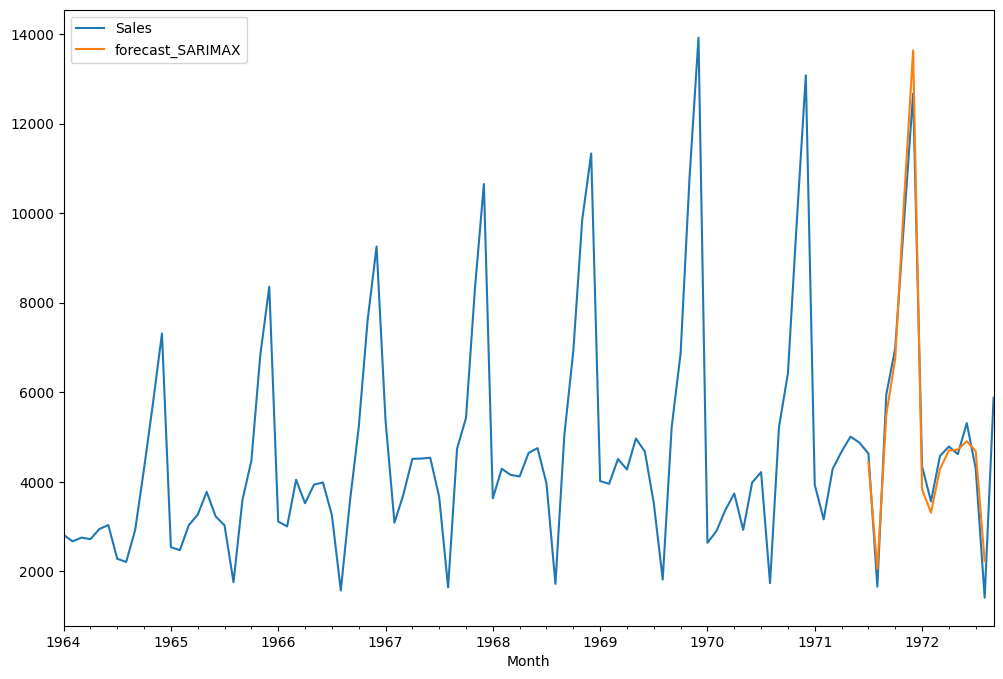

In [ ]:
df[['Sales','forecast_SARIMAX']].plot(figsize=(12,8))

In [ ]:
## dateoffset
from pandas.tseries.offsets import DateOffset
## add for 24 months

In [ ]:
df.index[-1]


Timestamp('1972-09-01 00:00:00')

In [ ]:
future_dates = [df.index[-1]+ DateOffset(months=x)for x in range(0,24)]

In [ ]:
future_dates[1:]

[Timestamp('1972-10-01 00:00:00'),
 Timestamp('1972-11-01 00:00:00'),
 Timestamp('1972-12-01 00:00:00'),
 Timestamp('1973-01-01 00:00:00'),
 Timestamp('1973-02-01 00:00:00'),
 Timestamp('1973-03-01 00:00:00'),
 Timestamp('1973-04-01 00:00:00'),
 Timestamp('1973-05-01 00:00:00'),
 Timestamp('1973-06-01 00:00:00'),
 Timestamp('1973-07-01 00:00:00'),
 Timestamp('1973-08-01 00:00:00'),
 Timestamp('1973-09-01 00:00:00'),
 Timestamp('1973-10-01 00:00:00'),
 Timestamp('1973-11-01 00:00:00'),
 Timestamp('1973-12-01 00:00:00'),
 Timestamp('1974-01-01 00:00:00'),
 Timestamp('1974-02-01 00:00:00'),
 Timestamp('1974-03-01 00:00:00'),
 Timestamp('1974-04-01 00:00:00'),
 Timestamp('1974-05-01 00:00:00'),
 Timestamp('1974-06-01 00:00:00'),
 Timestamp('1974-07-01 00:00:00'),
 Timestamp('1974-08-01 00:00:00')]

In [ ]:
future_dataset=pd.DataFrame(index=future_dates[1:],columns=df.columns)

In [ ]:
future_dataset.tail()

,Sales,Seasonal first diff,forecast,forecast_SARIMAX
1974-04-01,NaN,NaN,NaN,NaN
1974-05-01,NaN,NaN,NaN,NaN
1974-06-01,NaN,NaN,NaN,NaN
1974-07-01,NaN,NaN,NaN,NaN
1974-08-01,NaN,NaN,NaN,NaN


In [ ]:
future_df = pd.concat([df,future_dataset])

<ipython-input-104-a1a4bb0b7d51>:1: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  future_df = pd.concat([df,future_dataset])


In [ ]:
future_df.shape

(128, 4)

In [ ]:
future_df['forecast_SARIMAX2'] = results.predict(start=104,end=124,dynamic=True)

<Axes: >

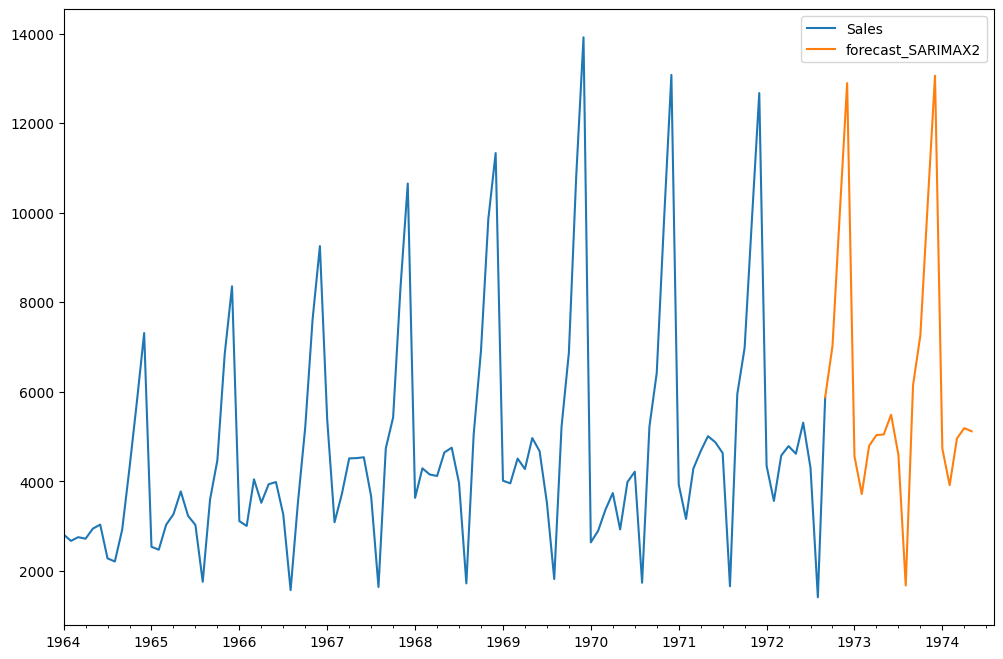

In [ ]:
future_df[['Sales','forecast_SARIMAX2']].plot(figsize=(12,8))